# Análise dos Dados do Airbnb - *Istambul*


---
Fundada em 667 A.C, a cidade de Istambul, que já foi conhecida também por Bizâncio e por Constantinopla, já foi a capital do Império Romano do Oriente e do Império Otomano.

Atualmente, apesar de não ser a capital da Turquia, trata-se da maior cidade do país, sendo o principal polo comercial, cultural, industrial e tecnológico, além de uma das mais populosas do mundo.  

<img alt="Image Istanbul" width="200%" src="https://github.com/arturlc/Portifolio/blob/main/img/Istanbul.png?raw=true">


Por possuir grande beleza e uma extensa e rica história, a cidade de Istambul está sempre na lista de cidades mais visitadas do mundo. Tendo isso em mente, uma das primeiras coisas a se pensar antes de viajar, é onde se hospedar.

Pensando nisso, este artigo tem como objetivo uma análise exploratória dos dados de hospedagem na cidade de Istambul fornecidos pelo [Airbnb](https://www.airbnb.com), a maior empresa hoteleira da atualidade. A utilização desses dados só é possível graças a uma iniciativa da empresa que, por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), compartilha grande quantidade de dados, permitindo o desenvolvimento de projetos e soluções de *Data Science*.


<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Istambul, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados

Como mencionado, todos os dados usados neste artigo foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/).

Para esta análise exploratória inicial, será baixado apena o seguinte arquivo:



*   `listings.csv` - *Summary information and metrics for listings in Istanbul (good for visualisations).*

Importante: O portal está em constante evolução, e em determinado momento, pode ser que o [conjunto de dados](http://data.insideairbnb.com/turkey/marmara/istanbul/2022-12-30/visualisations/listings.csv) exato utilizado nesse notebook não esteja mais disponível, o que quebraria nosso código.

Pensando nisso, foi disponibilizado [aqui](https://github.com/arturlc/Portifolio/blob/main/Analisando_Dados_do_Airbnb/listings.csv) o conjunto utilizado, para que você sempre consiga utilizar esse material.

Com isso em mente, vamos ao projeto.



## Instalando as bibliotecas



No início de qualquer projeto é necessária a importação de algumas bibliotecas.

As bibliotecas utizadas para as análises deste projeto serão:

*   [Pandas](https://pandas.pydata.org/docs/)
*   [Matplotlib](https://matplotlib.org/stable/)
*   [Seaborn](https://seaborn.pydata.org/index.html)
*   [Folium](https://python-visualization.github.io/folium/index.html)
*   [Pywaffle](https://pypi.org/project/pywaffle/)
*   [Wordcloud](https://amueller.github.io/word_cloud/index.html)





In [ ]:
# importar os pacotes necessarios
!pip install pywaffle -q
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium import plugins
from pywaffle import Waffle

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.4/31.4 MB 18.6 MB/s eta 0:00:00


In [ ]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv('http://data.insideairbnb.com/turkey/marmara/istanbul/2022-12-30/visualisations/listings.csv')

## Análise dos Dados

Esta etapa tem por objetivo criar uma consciência situacional inicial e permitir um entendimento de como os dados estão apresentados e estruturados.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36717 entries, 0 to 36716
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              36717 non-null  int64  
 1   name                            36694 non-null  object 
 2   host_id                         36717 non-null  int64  
 3   host_name                       36717 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   36717 non-null  object 
 6   latitude                        36717 non-null  float64
 7   longitude                       36717 non-null  float64
 8   room_type                       36717 non-null  object 
 9   price                           36717 non-null  int64  
 10  minimum_nights                  36717 non-null  int64  
 11  number_of_reviews               36717 non-null  int64  
 12  last_review                     

**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada 
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* host_name - Nome do anfitrião
* `neighbourhood_group` - o grupo de bairro foi geocodificado usando a latitude e longitude
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias
* `number_of_reviews_ltm` - Número de reviews da lista nos últimos 12 meses
* `license` - Número de licença 


Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [ ]:
# mostrar as 5 primeiras entradas
df.head()

id                                       name  host_id host_name  \
0  247874        Istiklal Avenue,Sadri alisik street  1298849    Berkan   
1  618156         Sultanahmet-Istanbul, Adalar Suite  2999837     Saban   
2  253055        CIHANGIR | Stunning Bosphorus View!   852380     Ilker   
3  620129  Unique Concept in the Old City (Studio 1)  3072862    Levent   
4   27271       Lovely apartment in perfect location   117026     Mutlu   

   neighbourhood_group neighbourhood  latitude  longitude        room_type  \
0                  NaN       Beyoglu  41.03333   28.98030  Entire home/apt   
1                  NaN         Fatih  41.00417   28.96604  Entire home/apt   
2                  NaN       Beyoglu  41.03375   28.98324  Entire home/apt   
3                  NaN         Fatih  41.00456   28.97980     Private room   
4                  NaN       Beyoglu  41.03254   28.98153  Entire home/apt   

   price  minimum_nights  number_of_reviews last_review  reviews_per_month  \
0    588               2                197  2022-11-29               1.50   
1    879               1                 89  2022-11-06               0.72   
2   3139               3                 86  2022-11-20               0.64   
3   4315               1                 17  2022-04-30               0.14   
4    999              10                  4  2022-11-01               0.04   

   calculated_host_listings_count  availability_365  number_of_reviews_ltm  \
0                               1                39                     26   
1                              13               354                     17   
2                               5               319                     15   
3                               5               306                      2   
4                               1               272                      2   

   license  
0      NaN  
1      NaN  
2      NaN  
3      NaN  
4      NaN

### **Entradas e variáveis**

Prosseguindo com a análise, vamos identificar a quantidade de entradas que nosso conjunto de dados possui e ver os tipos de cada coluna.

O dataset utilizado nesse projeto é uma versão "resumida" do Airbnb. Na mesma página em que o arquivo `listings.csv` há uma versão mais detalhada(`listings.csv.gz`).

In [ ]:
# identificar o volume de dados do DataFrame
print("O número de entradas é: ", df.shape[0])
print("O número de colunas é: ", df.shape[1],"\n")

# verificar o tipo das entradas
display(df.dtypes)

O número de entradas é:  36717
O número de colunas é:  18 



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                           float64
dtype: object

### **Identificando valores ausentes**

A qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

* É possível ver que as colunas `license` e `neighbourhood_group` possuem 100% dos seus valores faltantes. 
* As variáveis `reviews_per_month` e `last_review` possuem valores nulos em quase metade das linhas.
* A variável `name` tem menos de 0,1% dos valores nulos.

In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum()/df.shape[0]).sort_values(ascending=False)*100

license                           100.000000
neighbourhood_group               100.000000
reviews_per_month                  40.945611
last_review                        40.945611
name                                0.062641
minimum_nights                      0.000000
number_of_reviews_ltm               0.000000
availability_365                    0.000000
calculated_host_listings_count      0.000000
number_of_reviews                   0.000000
id                                  0.000000
room_type                           0.000000
longitude                           0.000000
latitude                            0.000000
neighbourhood                       0.000000
host_name                           0.000000
host_id                             0.000000
price                               0.000000
dtype: float64

Como as colunas `license` e `neighbourhood_group` estão vazias, iremos retirá-las de nosso *dataset* com a função _`drop`_. No caso das colunas `review_per_month` e `last_review`, mesmo não estando inteiramente vazias, suas informações não são de nosso interesse no momento, por isso, também iremos excluí-las de nosso conjunto de dados.

Já com com a coluna ``name``, que possue menos de 1% de valores nulos, vamos apenas eliminar estas linhas que apresentam valores nulos utilizando _`dropna`_.

In [ ]:
# excluindo colunas vazia e com informações que não interessam
df.drop(columns=['license', 'neighbourhood_group', 'reviews_per_month', 'last_review'], inplace=True)

# excluindo entradas com valores ausentes
df.dropna(axis=0, inplace=True)

Após o processo de limpeza, iremos analisar como o nosso conjunto de dados está em relação a dados ausentes.

In [ ]:
# verificando dados ausente após a limpeza
df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64

### **Distribuição das variáveis?**

Com o uso de histogramas, iremos verificar a distribuição das variáveis numéricas de nosso dataset.

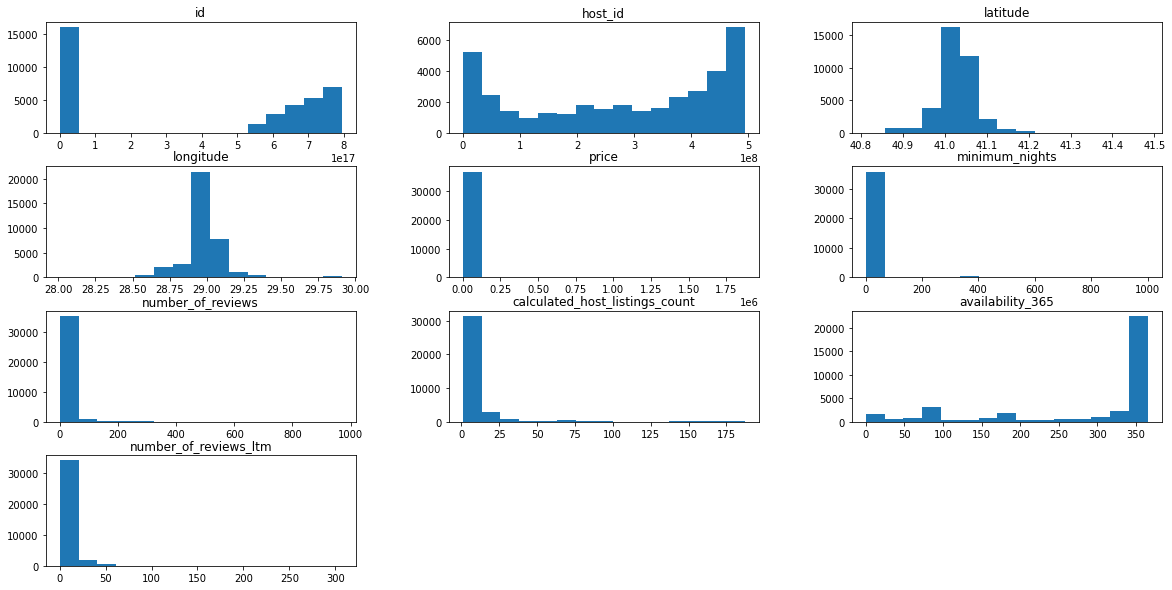

In [ ]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(20,10), grid=False);

### **Outliers**

_Outliers_ são nada mais nada menos que valores atípicos entre os dados analisados. Esses valores podem ser avaliados a partir do quanto diferem do restante em um conjunto de dados (na etapa de tratamento de dados será mostrada uma forma de definir _outliers_).

Eles podem possuir vários segnificados, como erros na coleta ou limpeza de dados, erro de medição, bem como casos que fogem à regra e que podem ser interessantes de se manter. 

Por isso, antes de decidir se vale a pena excluir, manter ou até mesmo trocar por outro valor, é necessário conhecimento dos dados, o que representam, como foram coletados ou produzidos, etc.

No caso do nosso conjunto de dados, pela distribuição dos histogramas, podemos observar indícios da presença de _outliers_. Podemos ver isso nas variáveis `price`, `minimum_nights`.

Os valores não seguem uma distribuição, e distorcem a representação gráfica. Para confirmar a presença desses outliers, iremos utilizar duas técnicas para nos auxiliar:



*   Resumo estatístico por meio da função `describe()`.
*   Plotar `boxplots` para as variáveis.



In [ ]:
# ver o resumo estatístico das variáveis numéricas

display(df[['price','minimum_nights']].describe().round(2))


price  minimum_nights
count    36694.00        36694.00
mean      2505.33           15.95
std      25595.68           93.43
min         57.00            1.00
25%        700.00            1.00
50%       1179.00            2.00
75%       1871.00            3.00
max    1871235.00         1000.00

Olhando o resumo estatísico, podemos confirmar algumas hipóteses:


*   A variável `price` possui 75% dos valores abaixo de 1.871 liras turcas, porém seu valor máximo é 1.871.235 liras turcas.
*   O valor máximo da variável `minimum_nights` está acima de 365 dias do ano.



#### Tratamento de dados

Podemos ver que nosso conjunto de dados possui valores que podem interferir numa análise mais precisa. Para tal, utilizaremos métodos estatísticos para o cálculo dos limites inferiores e superiores e, assim, excluir os dados fora desses limites, melhorando a qualidade dos nossos dados.

Para o cálculo dos limites, utilizaremos a variação interquartil(IQR), uma medida de dispersão baseada na mediana, que é obtida subtraindo-se o terceiro quartil(75%) pelo primeiro quartil(25%):


**IQR = Q3 - Q1**


Com o IQR em mãos, Podemos calcular os limites, onde valores abaixo do limite inferior e acima do superior são outliers.


*   Limite inferior:   **Q1 - (1,5*IQR)** 
*   Limite superior:   **Q1 + (1,5*IQR)**


Após essa breve explicação, vamos aos cálculos

In [ ]:
# definindo Q1, Q3 e IQR da variável price

q1_price = df.price.quantile(q=0.25)
q3_price = df.price.quantile(q=0.75)
iqr_price = q3_price - q1_price

In [ ]:
# definindo Q1, Q3 e IQR da variável minimum_nights

q1_minimum_nights = df.minimum_nights.quantile(q=0.25)
q3_minimum_nights = df.minimum_nights.quantile(q=0.75)
iqr_minimum_nights = q3_minimum_nights - q1_minimum_nights

In [ ]:
# definindo os limites superiores e inferiores das variáveis price e minimum_nights

inf_price = q1_price - 1.5*iqr_price
sup_price = q3_price + 1.5*iqr_price

inf_minimum_nights = q1_minimum_nights - 1.5*iqr_minimum_nights
sup_minimum_nights = q3_minimum_nights + 1.5*iqr_minimum_nights

In [ ]:
print(f'limite inferior de price: {inf_price}')
print(f'limite superior de price: {sup_price}')
print(f'IQR de price: {iqr_price}')

limite inferior de price: -1056.5
limite superior de price: 3627.5
IQR de price: 1171.0


In [ ]:
print(f'limite inferior de minimum_nights: {inf_minimum_nights}')
print(f'limite superior de minimum_nights: {sup_minimum_nights}')
print(f'IQR de minimum_nights: {iqr_minimum_nights}')

limite inferior de minimum_nights: -2.0
limite superior de minimum_nights: 6.0
IQR de minimum_nights: 2.0


#### Gráficos boxplot de price e minimum_nights

Com os valores dos limites encontrados, vamos gerar gráficos boxplot para analisar o quanto os outliers estão interferindo em nossa análise. Iremos mostrar numericamente quantas entradas se encontram acima dos limites e suas porcentagens no dataset.

Entradas acima do limite de price: 2795
Porcentagem de entradas acima do limite de price: 7.62%


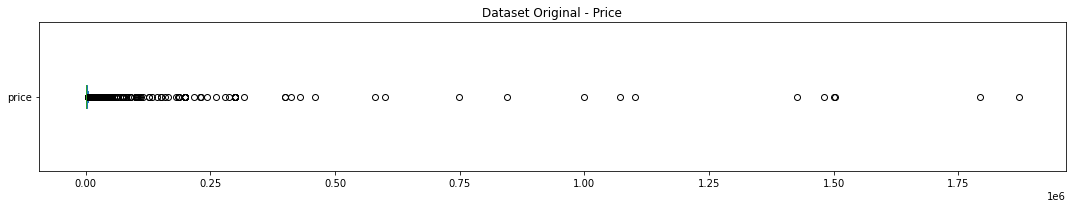

In [ ]:
# verificando o conjunto original para a variável price

fig, ax = plt.subplots(figsize=(15,3))
df.price.plot(kind='box', vert=False)
ax.set_title('Dataset Original - Price')
fig.tight_layout()

print(f'Entradas acima do limite de price: {len(df[df.price>sup_price])}')
print(f'Porcentagem de entradas acima do limite de price: {len(df[df.price>sup_price]) / df.shape[0]*100:.2f}%')


Entradas acima do limite de minimum_nights: 5311
Porcentagem de entradas acima do limite de minimum_nights: 14.47%


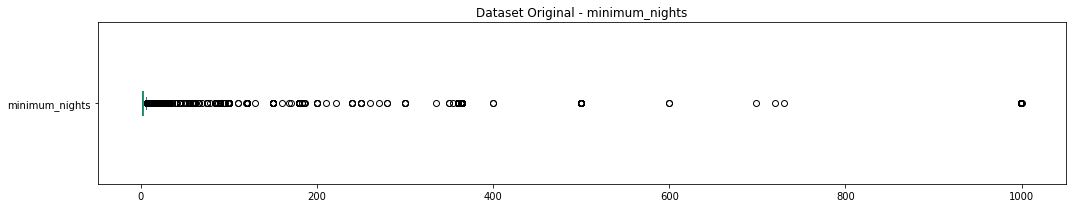

In [ ]:
# verificando o conjunto original para a variável minimum_nights

fig, ax = plt.subplots(figsize=(15,3))
df.minimum_nights.plot(kind='box', vert=False)
ax.set_title('Dataset Original - minimum_nights')
fig.tight_layout()

print(f'Entradas acima do limite de minimum_nights: {len(df[df.minimum_nights>sup_minimum_nights])}')
print(f'Porcentagem de entradas acima do limite de minimum_nights: {len(df[df.minimum_nights>sup_minimum_nights]) / df.shape[0]*100:.2f}%')

#### Excluindo outliers 
Agora que obtivemos a quantidade de outliers e a porcentagem deles no nosso conjunto de dados, chegou a hora de decidir o que fazer com eles. Para o nosso caso, a decisão tomada foi a de exluí-los de nossso dataset.

In [ ]:
# limpando o dataset

df_clean = df.copy()

df_clean.drop(df_clean[df_clean.price > sup_price].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > sup_minimum_nights].index, axis=0, inplace=True)

print(f'Quantidade de linhas e colunas antes da exclusão: {df.shape}')
print(f'Quantidade de linhas e colunas depois da exclusão: {df_clean.shape}')

Quantidade de linhas e colunas antes da exclusão: (36694, 14)
Quantidade de linhas e colunas depois da exclusão: (29077, 14)


Com as exclusões necessárias realizadas, iremos fazer uma análise comparativa dos valores estatísticos das variáveis.

In [ ]:
print('{}ANTES{}'.format(15*'-',15*'-'))
print(df[['minimum_nights','price']].describe().round(2))
print('{}DEPOIS{}'.format(15*'-',15*'-'))
print(df_clean[['minimum_nights','price']].describe().round(2))

---------------ANTES---------------
       minimum_nights       price
count        36694.00    36694.00
mean            15.95     2505.33
std             93.43    25595.68
min              1.00       57.00
25%              1.00      700.00
50%              2.00     1179.00
75%              3.00     1871.00
max           1000.00  1871235.00
---------------DEPOIS---------------
       minimum_nights     price
count        29077.00  29077.00
mean             1.98   1248.84
std              1.26    751.17
min              1.00     60.00
25%              1.00    668.00
50%              1.00   1104.00
75%              3.00   1678.00
max              6.00   3627.00


É possível observar que a exclusão dos outliers nos trouxe grandes mudanças para a nossa análise.


*   O preço máximo, que era de 1,87 milhões de liras turcas, caiu para 3,6 mil liras turcas.
*   O valor máximo de número mínimo de noites caiu de 1000 noites para 6.
*   Com a exlusão dos outliers, tanto a média quanto o desvio padrão caíram drasticamente.






#### Histogramas sem outliers
vejamos agora como está a distribuição de variáveis depois de removermos os outliers de `minimum_nights` e `price`.

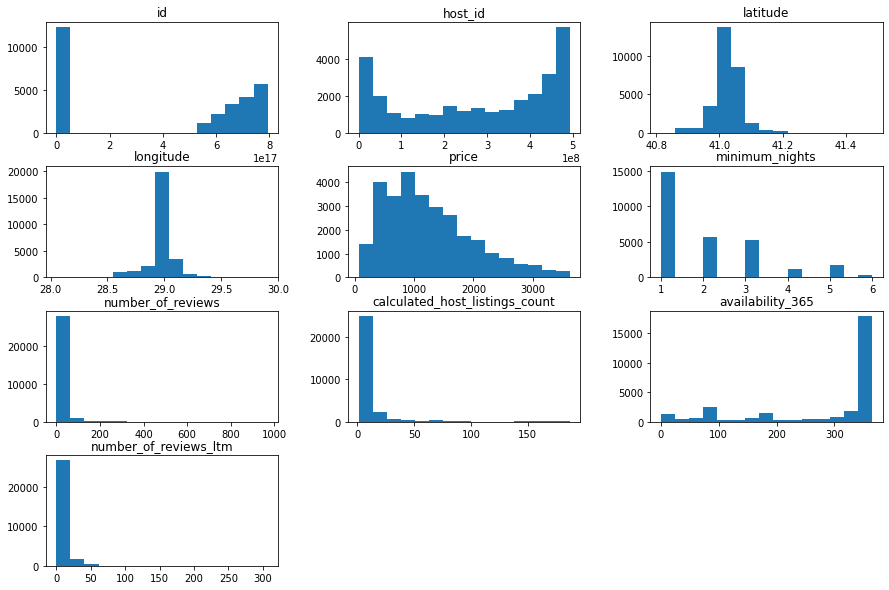

In [ ]:
df_clean.hist(figsize=(15,10), bins=15, grid=False);

### **Correlação entre as variáveis**

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, iremos:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [ ]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365']].corr()
# mostrar a matriz de correlação
display(corr)

price  minimum_nights  number_of_reviews  \
price                           1.000000        0.080834           0.061792   
minimum_nights                  0.080834        1.000000           0.037223   
number_of_reviews               0.061792        0.037223           1.000000   
calculated_host_listings_count  0.184788        0.007001           0.037021   
availability_365                0.068679       -0.103301          -0.079716   

                                calculated_host_listings_count  \
price                                                 0.184788   
minimum_nights                                        0.007001   
number_of_reviews                                     0.037021   
calculated_host_listings_count                        1.000000   
availability_365                                      0.015604   

                                availability_365  
price                                   0.068679  
minimum_nights                         -0.103301  
number_of_reviews                      -0.079716  
calculated_host_listings_count          0.015604  
availability_365                        1.000000

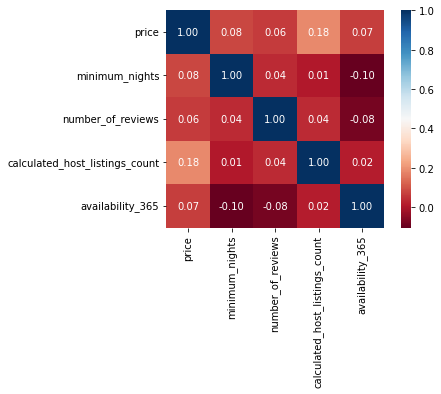

In [ ]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

A conclusão obtida é a de que há não há grau significativo de causalidade ou correlação entre as variáveis numéricas analisadas. 

## **Análise de dados**

Com todas as etapas de tratamento de dados realizadas, vamos à analise de dados em si. Nessa etapa iremos definir alguns valores médios, além de apresentar algumas representações gráficas e mapas.




### **Média dos preços de aluguel**

In [ ]:
# média da coluna 'price'
print(f'O custo médio por noite em Istambul é ₺{df_clean.price.mean():.2f}')

O custo médio por noite em Istambul é ₺1248.84


### **Tipo de imóvel mais alugado no Airbnb**

A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Quem já alugou pelo site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()` e realizar uma representação gráfica do tipo `Waffle`.

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    18161
Private room       10074
Shared room          527
Hotel room           315
Name: room_type, dtype: int64

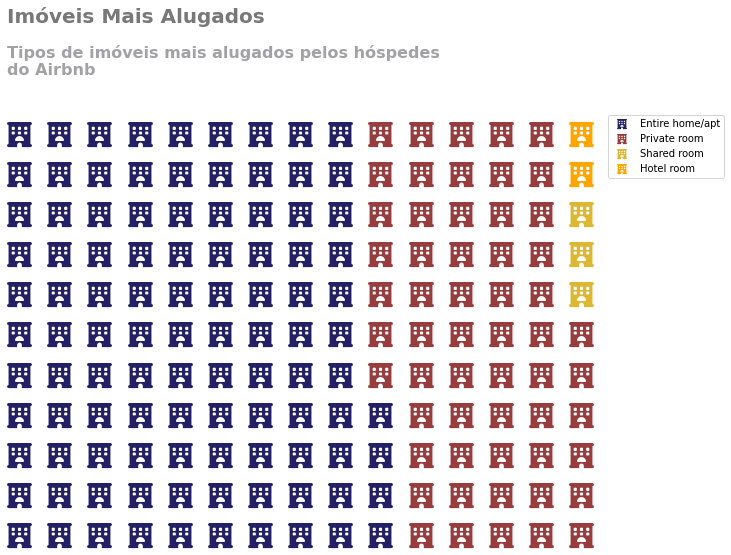

In [ ]:
# criar gráfico do tipo waffle representando os tipos de imóveis

data = dict(df_clean['room_type'].value_counts())

fig = plt.figure(
    FigureClass=Waffle,
    figsize=(12,8),
    rows=11,
    columns=15,
    colors=("#232066", "#983D3D", "#DCB732", "#FFA500"),
    values=data, icons='hotel', icon_size=25,
    legend={'loc': 'upper left','bbox_to_anchor': (1, 1)},
    icon_legend=True
)

# título
plt.text(0, 1.2, 'Imóveis Mais Alugados',
         fontsize=20,
         color='#787878',
         weight='bold'
         )

# subtítulo
plt.text(0, 1.15, 'Tipos de imóveis mais alugados pelos hóspedes\ndo Airbnb',
         verticalalignment="top",
         fontsize=16,
         color='#A2A1A3',
         weight='bold'
         )

fig.set_tight_layout(False)


In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
display((df_clean['room_type'].value_counts() / df_clean.shape[0])*100)

Entire home/apt    62.458300
Private room       34.645940
Shared room         1.812429
Hotel room          1.083330
Name: room_type, dtype: float64

### **Localidades mais caras e mais baratas do dataset**

Uma maneira de se verificar uma variável em função da outra é usando `groupby()`. No caso, queremos comparar os bairros (neighbourhoods) a partir do preço de locação.

In [ ]:
# ver preços por bairros, na média
print(df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False).round(2))

neighbourhood
Sile             1548.57
Beyoglu          1460.45
Basaksehir       1452.66
Silivri          1404.86
Fatih            1380.16
Sisli            1371.46
Catalca          1315.92
Zeytinburnu      1310.98
Adalar           1300.77
Besiktas         1292.53
Bagcilar         1280.61
Beykoz           1252.47
Sariyer          1223.01
Beylikduzu       1194.22
Arnavutkoy       1162.18
Bakirkoy         1158.04
Buyukcekmece     1132.82
Atasehir         1123.50
Gaziosmanpasa    1095.97
Kartal           1061.81
Kadikoy          1033.68
Kagithane        1030.71
Bahcelievler     1017.10
Bayrampasa       1015.75
Pendik            966.78
Kucukcekmece      961.42
Uskudar           958.24
Umraniye          948.88
Esenyurt          947.55
Sultangazi        943.86
Eyup              923.38
Tuzla             890.58
Maltepe           887.08
Cekmekoy          847.85
Avcilar           823.80
Gungoren          772.45
Sultanbeyli       744.67
Sancaktepe        717.25
Esenler           563.30
Name: price

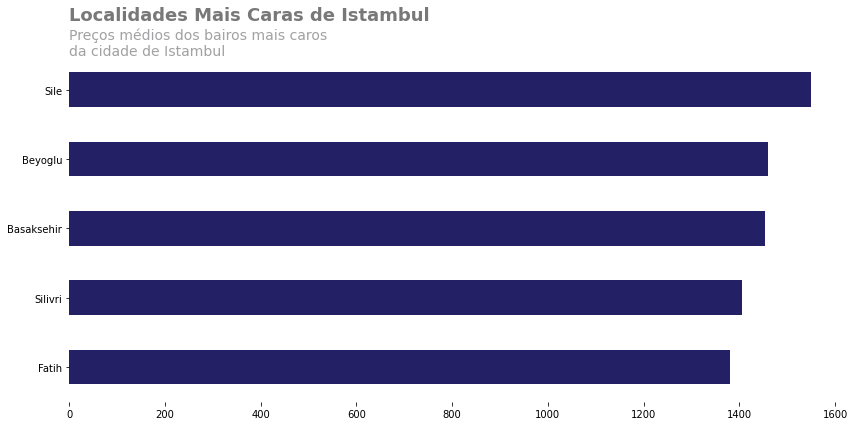

In [ ]:
# criar gráfico de barras representando as 5 localidades mais caras

CINZA1, CINZA2, CINZA3 = "#CFCDCE", "#A2A1A3", "#787878"
fig, ax = plt.subplots(figsize=(12,6))
ax = df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:5].plot.barh(color='#232066')
ax.invert_yaxis()
ax.set_ylabel('')

# remover as linhas(spines) que limitam a área do gráfico
plt.box(on=False)

# título
plt.text(0,-1, 'Localidades Mais Caras de Istambul',
         fontsize=18,
         color=CINZA3,
         weight='bold')

# subtítulo
plt.text(0, -0.9,
         'Preços médios dos bairos mais caros \nda cidade de Istambul',
         verticalalignment='top',
         fontsize=14,  
         color=CINZA2)

fig.tight_layout()


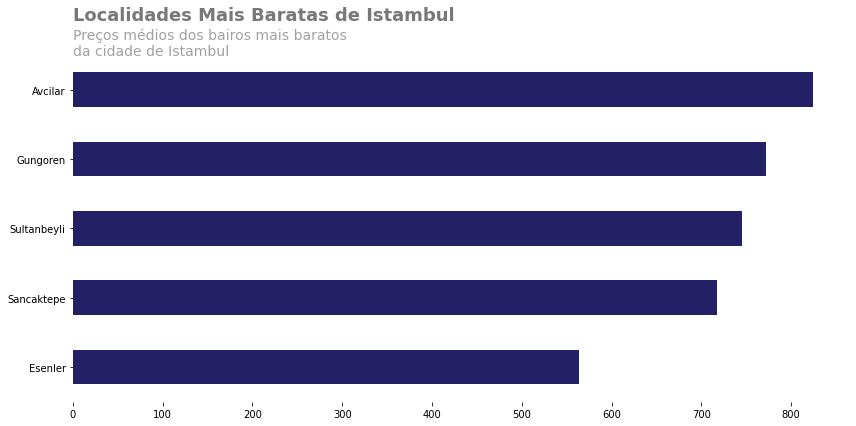

In [ ]:
# criar gráfico de barras representando as 5 localidades mais baratas

CINZA1, CINZA2, CINZA3 = "#CFCDCE", "#A2A1A3", "#787878"
fig, ax = plt.subplots(figsize=(12,6))
ax = df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[-5:].plot.barh(color='#232066')
ax.invert_yaxis()
ax.set_ylabel('')

# remover as linhas(spines) que limitam a área do gráfico
plt.box(on=False)

# título
plt.text(0,-1, 'Localidades Mais Baratas de Istambul',
         fontsize=18,
         color=CINZA3,
         weight='bold')

# subtítulo
plt.text(0, -0.9,
         'Preços médios dos bairos mais baratos \nda cidade de Istambul',
         verticalalignment='top',
         fontsize=14,  
         color=CINZA2)

fig.tight_layout()

### **Vizualindo os aluguéis por bairro**

No nosso conjunto de dados são fornecidas a latitude e longitude dos imóveis. Com isso em mente, iremos utilizar esses valores para vizualizar cada ponto em um mapa interativo e agrupá-los por bairro.

In [ ]:
# criar o mapa da cidade de Istambul
mapa = folium.Map(location = [41.015137, 28.979530], zoom_start = 9)

# adicionar as coordenadas dos imóveis ao mapa
coordenadas=[]
for lat, lng in zip(df_clean.latitude, df_clean.longitude):
    coordenadas.append([lat, lng])

mapa.add_child(plugins.MarkerCluster(coordenadas))
mapa

## Conclusões

Mesmo com um conjunto de dados resumido, pudemos realizar uma relativamente boa análise para a cidade de Istambul, em que já se percebeu a existência de outliers e dados ausentes em algumas das variáveis, que foram tratados, melhorando o desempenho de nossa análise. 

Também se notou que em algumas localidades há poucos imóveis disponíveis, o que pode distorcer as informações estatísticas de alguns atributos.

Por fim, lembra-se que este dataset é uma versão resumida, ideal apenas para uma abordagem inicial. Recomenda-se que seja usado, em uma próxima análise exploratória, o conjunto de dados completos. 